# A Model to Predict the Amount of Gold Recovery from Gold Ore

## Introduction

The project is based on the extraction and purfication data from Zyfra, a gold mining company to develop a prototype of a machine learning model to predict the amount of gold recovered from gold ore. 

## Data Overview

In [1]:
# Important necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

### Open the files and look into the data

In [2]:
# Load all the datasets
train = pd.read_csv('datasets/gold_recovery_train.csv')
test = pd.read_csv('datasets/gold_recovery_test.csv')
full = pd.read_csv('datasets/gold_recovery_full.csv')

# Display the first few rows of the dataset
display(train, test, full.head(5))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

In [3]:
# Display key columns from the training dataset related to gold concentration at various stages.
display(train[['rougher.output.concentrate_au', 
               'rougher.input.feed_au', 
               'rougher.output.tail_au'
               ]].head())

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au
0,19.793808,6.486150,1.170244
1,20.050975,6.478583,1.184827
2,19.737170,6.362222,1.162562
3,19.320810,6.118189,1.079755
4,19.216101,5.663707,1.012642


In [4]:
# Remove all rows with missing values from the training, test, and full datasets
train_data = train.dropna()
test_data = test.dropna()
full_data = full.dropna()

In [5]:
# This function calculates the recovery efficiency of gold during the rougher flotation stage.
def calculate_recovery(data):
    C = data['rougher.output.concentrate_au']
    F= data['rougher.input.feed_au']
    T= data['rougher.output.tail_au']
    if F==0 or C==0:
        return 0
    return (C * (F - T)) / (F * (C - T)) * 100

In [ ]:
# Apply the calculate_recovery function to each each row to calcuate gold recovery for train DataFrame
train_data['calculated_recovery'] = train_data.apply(calculate_recovery, axis=1)
print(train_data['calculated_recovery'].head())

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: calculated_recovery, dtype: float64


C:\Users\jeelf\AppData\Local\Temp\ipykernel_38780\1529490582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['calculated_recovery'] = train_data.apply(calculate_recovery, axis=1)


In [ ]:
# Calculate the Mean Absolute Error (MAE) between actual and calculated recovery values
train_mae = mean_absolute_error(train_data['rougher.output.recovery'], 
                                train_data['calculated_recovery'])

# Display the MAE to determine the accuracy of the calculated recovery values
display(train_mae)

9.460144184559453e-15

train_mae', a mean absolute error (MAE) is a regression evaluation metric to measure the average absolute difference between the 'rougher.output.recovery' and 'calculated_recovery'. 'train_mae' is 9.46e-15, lower MAE which means that on average the calcuated recovery are closer to the actual rougher.output.recovery values, which indicates better performance. As MAE is 9.46e-15, it shows that on average the predictions are off by 9.46e-15 units. 

### Analyze the features not available in the test set. What are these parameters? What is their type?

In [8]:
# Check the shape of the training dataset
train.shape

(16860, 87)

In [9]:
# Identify features that are present in train but missing in test
feature_columns_train = set(train.columns)
feature_columns_test = set(test.columns)
features_missing_in_test = feature_columns_train - feature_columns_test

# Print data types of the missing features
print("Features in training but not in test with their data types:")
for feature in features_missing_in_test:
    print(f"{feature}: {train_data[feature].dtype}")

Features in training but not in test with their data types:
primary_cleaner.output.tail_sol: float64
primary_cleaner.output.tail_pb: float64
primary_cleaner.output.concentrate_sol: float64
rougher.calculation.sulfate_to_au_concentrate: float64
rougher.calculation.floatbank11_sulfate_to_au_feed: float64
rougher.output.tail_pb: float64
secondary_cleaner.output.tail_au: float64
final.output.tail_au: float64
primary_cleaner.output.concentrate_ag: float64
rougher.output.concentrate_ag: float64
rougher.calculation.floatbank10_sulfate_to_au_feed: float64
primary_cleaner.output.concentrate_pb: float64
rougher.output.tail_sol: float64
final.output.tail_sol: float64
final.output.concentrate_au: float64
primary_cleaner.output.tail_au: float64
final.output.tail_ag: float64
rougher.output.tail_au: float64
final.output.tail_pb: float64
primary_cleaner.output.tail_ag: float64
rougher.output.concentrate_pb: float64
primary_cleaner.output.concentrate_au: float64
final.output.concentrate_sol: float64
se

In [10]:
# Count and print the number of missing features in test
num_missing_columns = len(features_missing_in_test)
print("Number of missing columns in test dataset:", num_missing_columns)

Number of missing columns in test dataset: 34


There are 34 features in the train set which are not available in test set. Most of the features are from tehnological process such as cleaner process, rougher au, and final au. Along with it all the features are from stages such as rougher, primary_cleaner, and final except secondary_cleaner. Lastly, those features are from parameter type such as output, state, and calculation except input. 

### Perform data preprocessing

In [11]:
# Checking the shape of train, test, and full datasets
n_rows, n_cols = train.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

n_rows, n_cols = test.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

n_rows, n_cols = full.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns")

The DataFrame has 16860 rows and 87 columns
The DataFrame has 5856 rows and 53 columns
The DataFrame has 22716 rows and 87 columns


In [12]:
# Convert date column to numeric format for train dataset
train['date'] = pd.to_datetime(train['date'])
train['date'] = pd.to_numeric(train['date'])/ 100000000000

Yes, without doing this, the value doesn't look like a date.

In [13]:
# Convert date column to numeric format for test dataset
test['date'] = pd.to_datetime(test['date'])
test['date'] = pd.to_numeric(test['date']) / 100000000000

In [14]:
# Convert date column to numeric format for full dataset
full['date'] = pd.to_datetime(full['date'])
full['date'] = pd.to_numeric(full['date']) / 100000000000

#### Duplicates

In [15]:
# Create a dictionary to process all datasets together
data = {
    'train': train,
    'test': test,
     'full': full}

In [16]:
# Define a function to find duplicates and report count in each dataset
def find_remove_duplicates(data):
    duplicates = data[data.duplicated()]
    return duplicates

# Apply duplicate detection function and print result for each dataset
for key, df in data.items():
    duplicates = find_remove_duplicates(df)
    print(f"Number of duplicated rows in {key}: {duplicates.shape[0]}")

Number of duplicated rows in train: 0
Number of duplicated rows in test: 0
Number of duplicated rows in full: 0


In [17]:
# Check for missing values in train dataset
train.isna().sum().sort_values(ascending=False)

rougher.output.recovery                               2573
rougher.output.tail_ag                                2250
rougher.output.tail_sol                               2249
rougher.output.tail_au                                2249
secondary_cleaner.output.tail_sol                     1986
                                                      ... 
primary_cleaner.state.floatbank8_d_level                27
rougher.calculation.floatbank10_sulfate_to_au_feed      27
rougher.calculation.floatbank11_sulfate_to_au_feed      27
primary_cleaner.input.feed_size                          0
date                                                     0
Length: 87, dtype: int64

In [18]:
# Check for missing values in test dataset
test.isna().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            353
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
rougher.input.floatbank10_sulfate             257
primary_cleaner.input.xanthate                166
rougher.input.floatbank10_xanthate            123
rougher.input.feed_sol                         67
rougher.input.floatbank11_sulfate              55
rougher.input.feed_rate                        40
secondary_cleaner.state.floatbank3_a_air       34
secondary_cleaner.state.floatbank2_b_air       23
rougher.input.feed_size                        22
secondary_cleaner.state.floatbank2_a_air       20
rougher.state.floatbank10_a_air                17
rougher.state.floatbank10_c_air                17
rougher.state.floatbank10_d_air                17
rougher.state.floatbank10_e_air                17
rougher.state.floatbank10_b_air                17
rougher.state.floatbank10_f_air                17
secondary_cleaner.state.floatbank3_a_level     16


In [19]:
# Check for missing values in full dataset
full.isna().sum().sort_values(ascending=False)

rougher.output.recovery                     3119
rougher.output.tail_ag                      2737
rougher.output.tail_au                      2736
rougher.output.tail_sol                     2736
rougher.input.floatbank11_xanthate          2257
                                            ... 
primary_cleaner.state.floatbank8_b_level      43
primary_cleaner.state.floatbank8_c_level      43
primary_cleaner.state.floatbank8_d_level      43
primary_cleaner.input.feed_size                0
date                                           0
Length: 87, dtype: int64

## Data Analysis

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [ ]:
# Extract gold, silver, and lead concentrations at various processing stages

au_stage_concentration_change = full[['primary_cleaner.output.concentrate_au', 
                                      'rougher.output.concentrate_au', 
                                      'final.output.concentrate_au']]

ag_stage_concentration_change = full[['primary_cleaner.output.concentrate_ag', 
                                      'rougher.output.concentrate_ag', 
                                      'final.output.concentrate_ag']]

pb_stage_concentration_change = full[['primary_cleaner.output.concentrate_pb', 
                                      'rougher.output.concentrate_pb', 
                                      'final.output.concentrate_pb']]

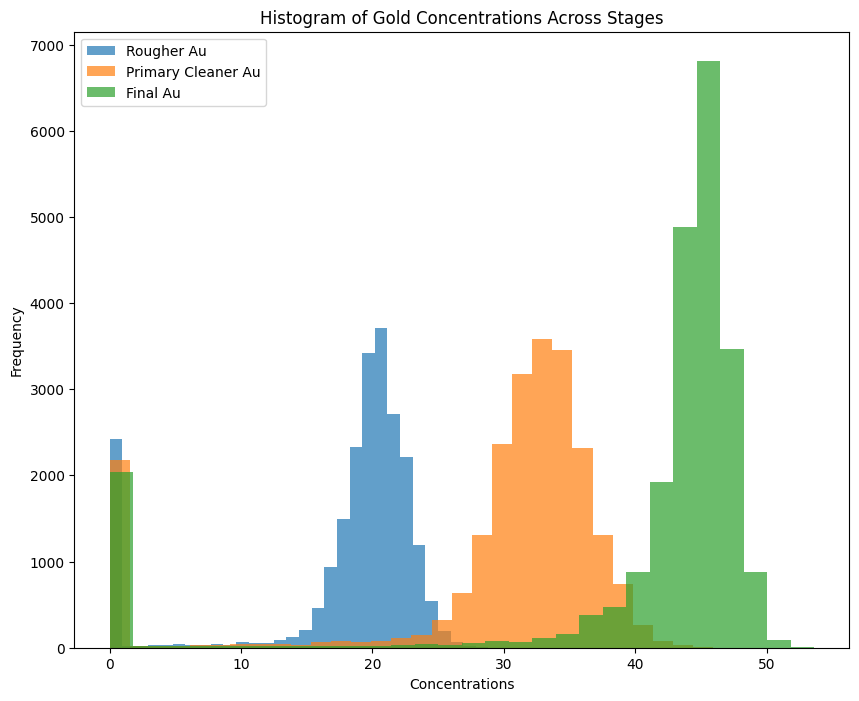

In [ ]:
# Plot histograms of gold concentrations across stages
au_stage_concentration_change = full[['primary_cleaner.output.concentrate_au', 
                                      'rougher.output.concentrate_au', 
                                      'final.output.concentrate_au']]

plt.figure(figsize=(10, 8))  
plt.hist(au_stage_concentration_change['rougher.output.concentrate_au'], 
         bins=30, 
         alpha=0.7, 
         label='Rougher Au')
plt.hist(au_stage_concentration_change['primary_cleaner.output.concentrate_au'], 
         bins=30, 
         alpha=0.7, 
         label='Primary Cleaner Au')
plt.hist(au_stage_concentration_change['final.output.concentrate_au'], 
         bins=30, 
         alpha=0.7, 
         label='Final Au')
plt.title('Histogram of Gold Concentrations Across Stages')
plt.xlabel('Concentrations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram above shows the distribution of gold concentrations across three processing stages in a ore purification process: Primary Cleaner, Rougher metal concentration and Final metal concentration. Rougher Gold (Au) indicates the inital stage of procession and shows its histogram shows lower gold concentrations with a peak around 30-32 units. Primary Cleaner Gold (Au) represents the intermediate stage after the rougher process. Thus, the concentrations are more centralized and slightly higher compared to the rougher stage. Lastly, Final Gold (Au) represents the final stage of ore purification process. The distribution shows significantly higher concentrations of gold with peaks around 45 units. Overall, it can be known that rougher gold genrally have lower concentratrions of gold as its the starting stage which might have other metals or raw materials. Primary Cleaner Gold shows an increase in gold concentration compared to the rougher stage indicating the efficiency of the cleaning stage. Lastly, Final Gold has the highest concentrations demonstrating that the ore purification process works effectively as most of the gold content is concentrated at the end. 

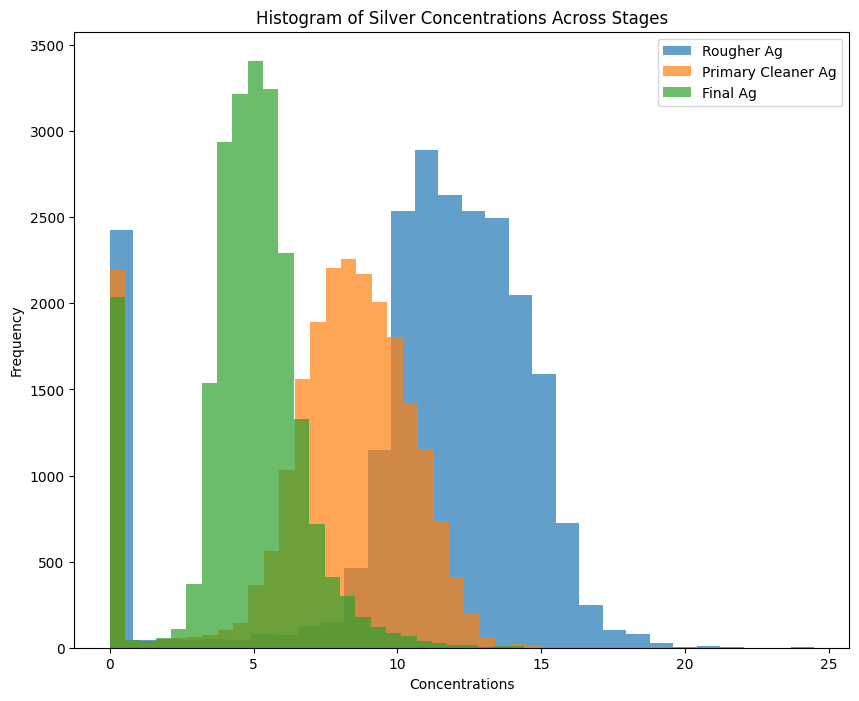

In [ ]:
# Plot histograms of silver concentrations across stages
ag_stage_concentration_change = full[['primary_cleaner.output.concentrate_ag', 
                                      'rougher.output.concentrate_ag', 
                                      'final.output.concentrate_ag']]

plt.figure(figsize=(10, 8))  

plt.hist(ag_stage_concentration_change['rougher.output.concentrate_ag'], 
         bins=30, 
         alpha=0.7, 
         label='Rougher Ag')
plt.hist(ag_stage_concentration_change['primary_cleaner.output.concentrate_ag'], 
         bins=30, 
         alpha=0.7, 
         label='Primary Cleaner Ag')
plt.hist(ag_stage_concentration_change['final.output.concentrate_ag'], 
         bins=30, 
         alpha=0.7, 
         label='Final Ag')
plt.title('Histogram of Silver Concentrations Across Stages')
plt.xlabel('Concentrations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram above shows the distribution of silver concentrations across three processing stages in a ore purification process: Primary Cleaner, Rougher metal concentration and Final metal concentration. Rougher Silver (Ag) is the initial stage of processing. The silver concentrations are broadly distributed, with a peak around 9-12 units. Primary Cleaner Silver (Ag) represents the intermediate stage after the rougher process. The silver concentrations are concentrated in a range around 6-11 units. A noticable shift, to the right compared to the rougher stage, indicating a moderate increase in silver concentration during this stage. Lastly, Final silver (Ag) represents the final stage of processing. Silver concentrations are clustered and significantly lower, peaking around 4-7 units. This might shows that silver content decreases in the final stage due to losses in refining for gold. It can be seen that during all three stages, there are some lower concentrations (closer to 0) present, likely representing unprocessed raw materials or loss during the early process. Overall, unlike like the gold histogram, silver concentrations declines in the final stage as the primary focus is to purify gold in this ore purification process. 

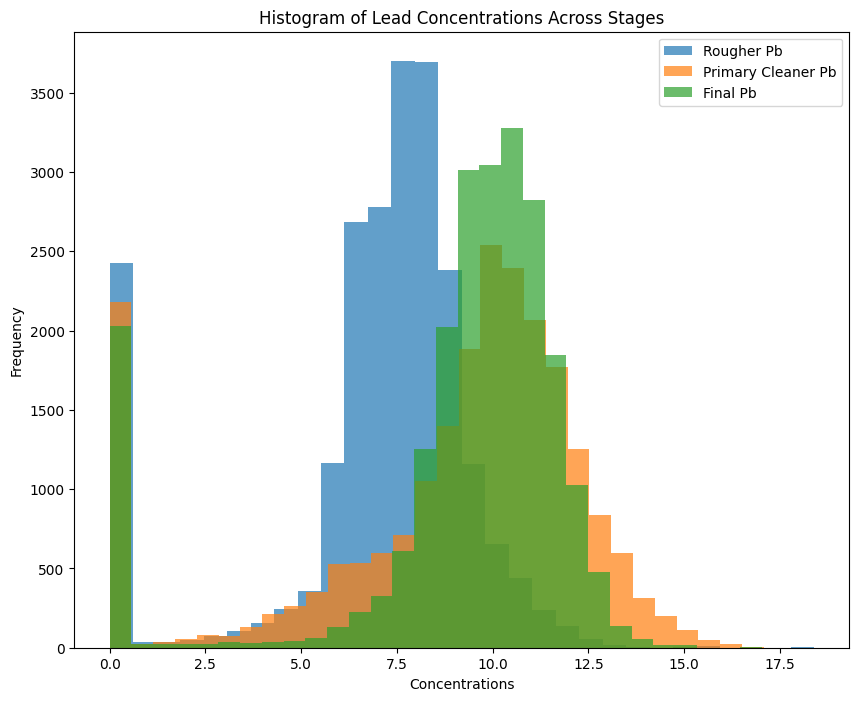

In [ ]:
# Plot histograms of lead concentrations across stages
pb_stage_concentration_change = full[['primary_cleaner.output.concentrate_pb', 
                                      'rougher.output.concentrate_pb', 
                                      'final.output.concentrate_pb']]

plt.figure(figsize=(10, 8))  
plt.hist(pb_stage_concentration_change['rougher.output.concentrate_pb'], 
         bins=30, 
         alpha=0.7, 
         label='Rougher Pb')
plt.hist(pb_stage_concentration_change['primary_cleaner.output.concentrate_pb'], 
         bins=30, 
         alpha=0.7, 
         label='Primary Cleaner Pb')
plt.hist(pb_stage_concentration_change['final.output.concentrate_pb'], 
         bins=30, 
         alpha=0.7, 
         label='Final Pb')
plt.title('Histogram of Lead Concentrations Across Stages')
plt.xlabel('Concentrations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histogram above shows the distribution of lead concentrations across three processing stages in a ore purification process: Primary Cleaner, Rougher metal concentration and Final metal concentration. Rougher Lead (Pb) is the initial stage of processing. The distribution peaks around 7-9 units and is more compact compared to the other stages. Primary Cleaner Lead (Pb) represents the intermediate stage after the rougher process. The concentration distribution is more spread out and peaks around 10-12 units. This stage seems to improve lead concentration compared to the rougher stage. Lastly, Final Lead (Pb) represents the final processing stage. Concentrations peak around 9-11 units, with a tigher distributions compared to the Primary Cleaner stage. But, lead concentrations in the final stage are better than that in primary cleaner stage which might mean that during the purification process lead is purified too when trying to purify gold.

### Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

In [ ]:
# Compare feed size distribution between train and test datasets
train_feed_size = train['rougher.input.feed_size'] + train['primary_cleaner.input.feed_size']
test_feed_size = test['rougher.input.feed_size'] + test['primary_cleaner.input.feed_size']

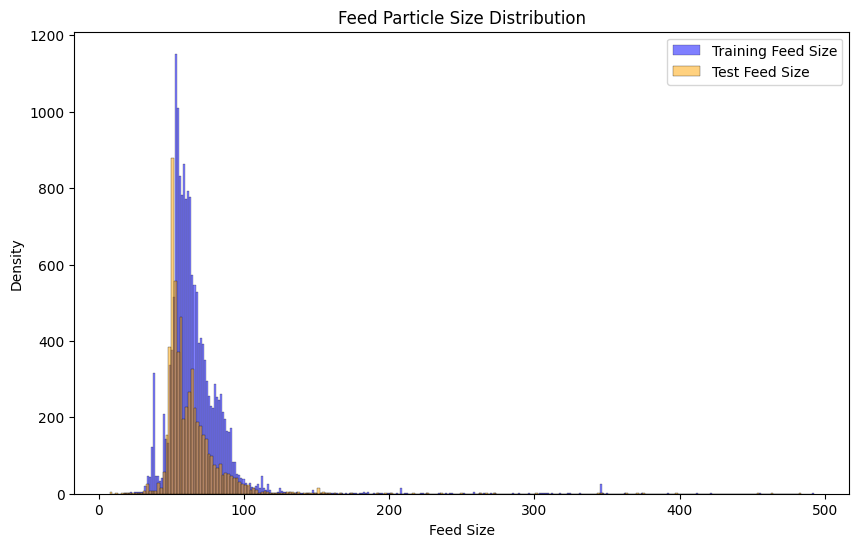

In [ ]:
# Plot histograms to compare feed size distribution between train and test datasets
plt.figure(figsize=(10, 6))
sns.histplot(train_feed_size, 
             label='Training Feed Size', 
             color='blue', 
             fill=True, 
             alpha=0.5)
sns.histplot(test_feed_size, 
             label='Test Feed Size', 
             color='orange', 
             fill=True, 
             alpha=0.5)
plt.title('Feed Particle Size Distribution')
plt.xlabel('Feed Size')
plt.ylabel('Density')
plt.legend()
plt.show()


The above graph represents the feed particle size distribution (including both rougher.input.feed_size and primary.cleaner.input.feed_size) for both training and test datasets. The distributions for training and test dataset overlap significantly suggesting that both datasets have similar particle size characteristics. The overlap indicates consistency between both datasets, which supports the validity of any models trained on this data. Both datasets have a sharp peak in density at approximately 50-75 feed size units representing the most common particle size range. This indicates that the majority of particles are within this size range. Both distributions are extended to larger particle sizes upto 500 units, but the density of these regions is much lower. This suggests that larger particles are present in both but mostly in train datasets but occur infrequently. 

In [26]:
# Compare individual rougher and primary cleaner feed size distributions among train and test datasets. 
train_rougher_feed_size = train['rougher.input.feed_size'] 
train_primary_cleaner_feed_size = train['primary_cleaner.input.feed_size']

test_rougher_feed_size = test['rougher.input.feed_size'] 
test_primary_cleaner_feed_size = test['primary_cleaner.input.feed_size']

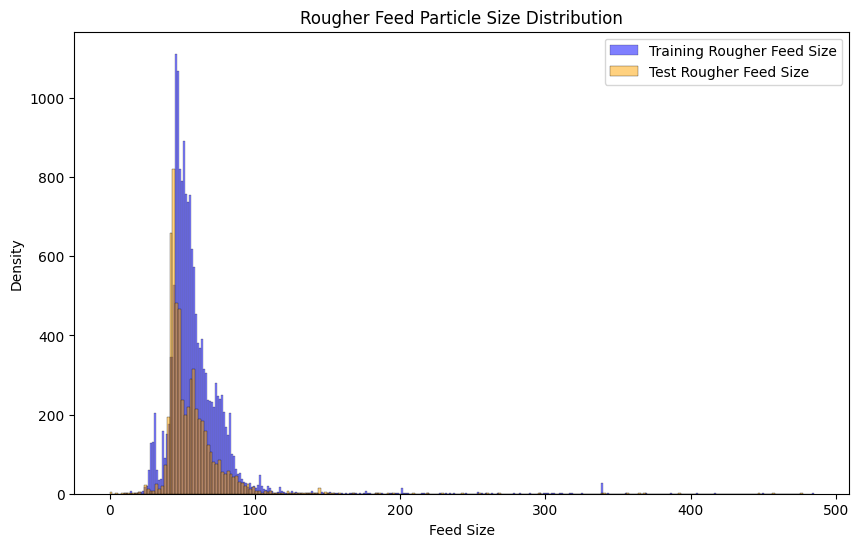

In [ ]:
# Plot histograms to compare individual rougher feed particle size distribution between train and test dataset.
plt.figure(figsize=(10, 6))
sns.histplot(train_rougher_feed_size, 
             label='Training Rougher Feed Size', 
             color='blue', 
             fill=True, 
             alpha=0.5)
sns.histplot(test_rougher_feed_size, 
             label='Test Rougher Feed Size', 
             color='orange', 
             fill=True, 
             alpha=0.5)
plt.title('Rougher Feed Particle Size Distribution')
plt.xlabel('Feed Size')
plt.ylabel('Density')
plt.legend()
plt.show()


The above graph represents the  rougher feed particle size distribution for both training and test datasets. The distributions for training and test dataset overlap significantly, especially in the smaller feed size range suggesting that both datasets have similar particle size characteristics. The overlap indicates consistency between both datasets, which supports the validity of any models trained on this data. Both datasets have a sharp peak in density at approximately 50-75 feed size units representing the most common particle size range. This indicates that the majority of particles are within this size range. The test dataset has slightly less density than the training dataset in some parts of the distribution. Both distributions are extended to larger particle sizes upto 500 units, but the density of these regions is much lower. This suggests that larger particles are present in both but mostly in train datasets but occur infrequently.

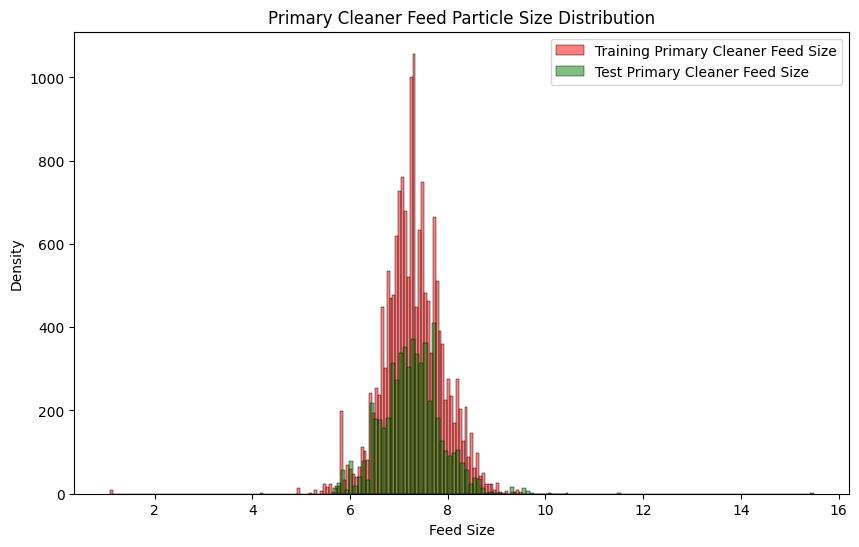

In [ ]:
# Plot histograms to compare individual primary cleaner feed particle size distribution between train and test dataset.
plt.figure(figsize=(10, 6))
sns.histplot(train_primary_cleaner_feed_size, 
             label='Training Primary Cleaner Feed Size', 
             color='red', 
             fill=True, 
             alpha=0.5)
sns.histplot(test_primary_cleaner_feed_size, 
             label='Test Primary Cleaner Feed Size', 
             color='green', 
             fill=True, 
             alpha=0.5)
plt.title('Primary Cleaner Feed Particle Size Distribution')
plt.xlabel('Feed Size')
plt.ylabel('Density')
plt.legend()
plt.show()


The above graph represents the primary cleaner feed particle size distribution for both training and test datasets. The distributions for training and test dataset overlap significantly, especially in the smaller feed size range (6-8) suggesting that both datasets have similar particle size characteristics. The overlap indicates consistency between both datasets, which supports the validity of any models trained on this data. Both datasets have a sharp peak in density at approximately 7-8 feed size units representing the most common particle size range. This indicates that the majority of particles are within this size range. The test dataset has slightly less density than the training dataset in some parts of the distribution. Both distributions are limited to smaller particle sizes upto 16 units, but the density of the regions after feed size 9 is much lower.

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies. 

In [ ]:
# Calculate total metal concentration in raw feed by summing 
# the concentrations of silver (Ag), gold (Au), and lead (Pb)
total_concentrations_raw_feed = (
    full['rougher.input.feed_ag'] + 
    full['rougher.input.feed_au'] + 
    full['rougher.input.feed_pb']
    )


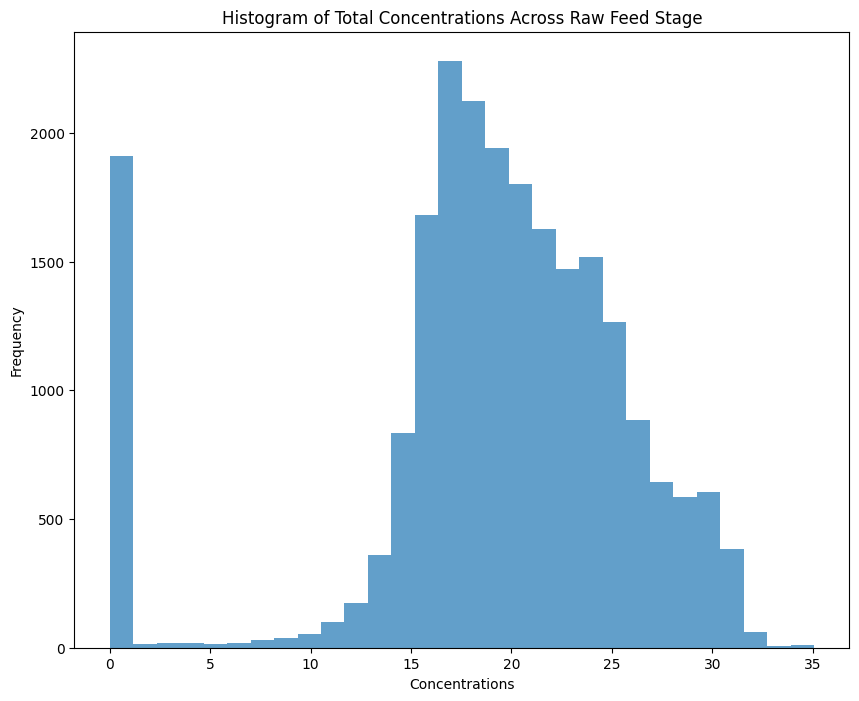

In [ ]:
# Graph histogram to compare total metal concentrations across raw feed stage

plt.figure(figsize=(10, 8))  
plt.hist(total_concentrations_raw_feed, 
         bins=30, 
         alpha=0.7, 
         label='Total Concentrations at Raw Feed Stage')
plt.title('Histogram of Total Concentrations Across Raw Feed Stage')
plt.xlabel('Concentrations')
plt.ylabel('Frequency')
plt.show()

The above histogram is displaying the distribution of "Total Concentration" across "Raw Feed" stage. There is a high frequency at 0 concentration suggesting the raw materials in which there are no metals such as Gold, Silver, and Lead present. Other than this, majority of the data points are concentrated between 15 to 30 forming a peak around 18-20. This represents the typical range of concentrations observed at the raw feed stage. There are some outliers which have higher concentrations above 30 which shows that extremely high concentrationbs are rare. Overall, the histogram shows a right-skewed distribution with most data points concentrated in a central range with few outliers at higher concentrations. 

In [ ]:
# Calculate total metal concentration in rougher concentrate by summing 
# the concentrations of silver (Ag), gold (Au), and lead (Pb)
total_concentrations_rougher_concentrate = (
    full['rougher.output.concentrate_ag'] + 
    full['rougher.output.concentrate_au'] + 
    full['rougher.output.concentrate_pb']
    )

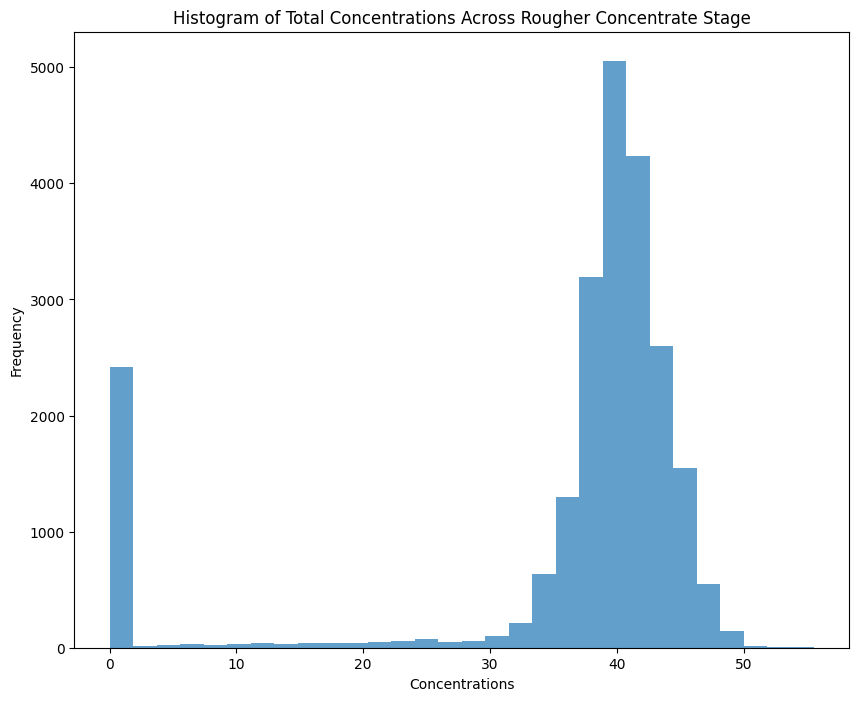

In [32]:
# Graph histogram to compare total metal concentrations across rougher concentrate stage
plt.figure(figsize=(10, 8))  


plt.hist(total_concentrations_rougher_concentrate, bins=30, alpha=0.7, label='Total Concentrations at Rougher Concentrate Stage')
plt.title('Histogram of Total Concentrations Across Rougher Concentrate Stage')
plt.xlabel('Concentrations')
plt.ylabel('Frequency')
plt.show()

The above histogram is displaying the distribution of "Total Concentrations" across "Rougher Concentrate" stage. There is a high frequency at 0 concentration suggesting the raw materials in which there are no metals such as Gold, Silver, and Lead present. Other than this, majority of the data points are concentrated between 30 and 50 forming a peak around 40-45. This represents the typical range of concentrations observed during rougher concentrate stage likely representing the expected or normal performance of the rougher concentrate process. There are few outliers which have higher concentrations above 50 which shows that extremely high concentrationbs are rare. Overall, the histogram shows a right-skewed distribution with most data points concentrated in a central range which have higher metal concentrations when compared to that of inraw feed stage with few outliers at higher concentrations.

In [ ]:
# Calculate total metal concentration in final concentrate by summing 
# the concentrations of silver (Ag), gold (Au), and lead (Pb)
total_concentrations_final_concentrate = (
    full['final.output.concentrate_ag'] + 
    full['final.output.concentrate_au'] + 
    full['final.output.concentrate_pb']
    )

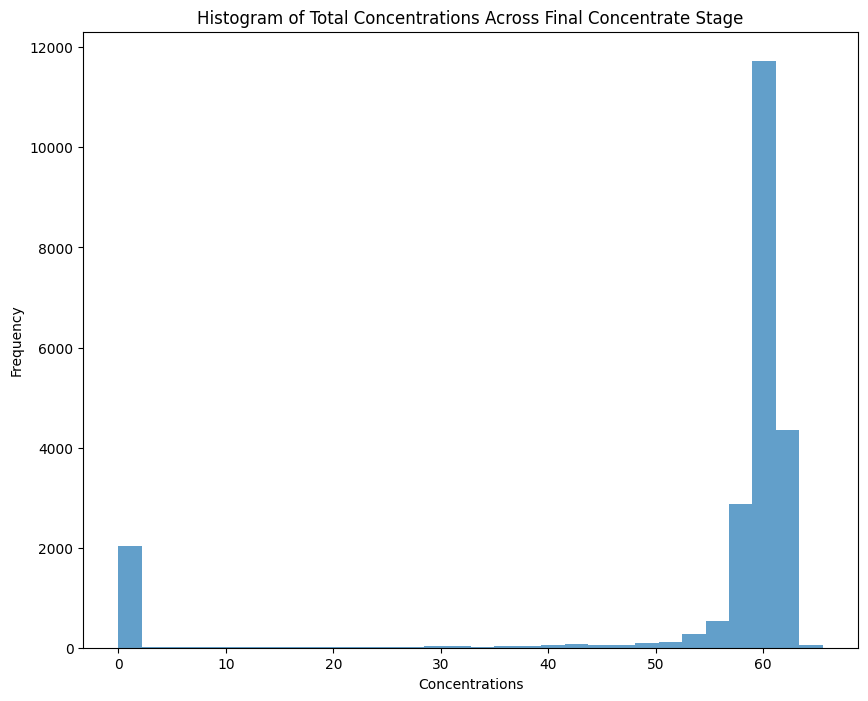

In [ ]:
# Graph histogram to compare total metal concentrations across final concentrate stage
plt.figure(figsize=(10, 8))  
plt.hist(total_concentrations_final_concentrate, 
         bins=30, 
         alpha=0.7, 
         label='Total Concentrations at Rougher Concentrate Stage')
plt.title('Histogram of Total Concentrations Across Final Concentrate Stage')
plt.xlabel('Concentrations')
plt.ylabel('Frequency')
plt.show()

The above histogram is displaying the distribution of "Total Concentration" across "Final Concentragte" stage. There is a low frequency at 0 concentration suggesting the raw materials in which there are no metals such as Gold, Silver, and Lead present. The frequency at 0 concentration is much lower when compared it with that during Raw Feed and Rougher Concentrate stages. Other than this, majority of the data points are concentrated between 55 to 62 forming a peak around 58-60. This represents the typical range of concentrations observed at the final concentrate stage. There are some outliers which have higher concentrations above 62 which shows that extremely high concentrationbs are rare. Overall, the histogram shows a right-skewed distribution with most data points concentrated in a central range with few outliers at higher concentrations.

Overall, all these three graphs represents the total metal concentrations during raw feed, rougher conentrate and final concentrate stages respectively. Comparing all three graphs together represents that the higher frequency at 0 concentrations is decreasing from stages to stages starting from raw feed to final concentrate. Following this all graphs are right skewed but the concentration range of most data points in these stages is increasing from stages to stages which represents that during the purification process the total concentrations of metals which includes gold, silver and, lead is increasing as they are purified by removing the waste raw materials. The abnormal values I saw among all three graphs are the frequency at 0 concentrations. But, I think it is worth removing those data points as those are disrupting data resulting into NaN values. 

## Dealing with NA and missing values

### Training Set

In [35]:
# Check the shape of train dataset before removing features not present in test dataset.
train.shape

(16860, 87)

In [36]:
# Remove the features not present in test dataset

target_columns = ['rougher.output.recovery', 'final.output.recovery']

feature_columns_train = set(train.columns) - set(target_columns)
features_missing_in_test = feature_columns_train - feature_columns_test

train = train.drop(columns=features_missing_in_test)

train.shape

(16860, 55)

I dropped the feature columns which are missing in test set but present in train set as the model won't fit if the columns in both sets are not same. So, I dropped all those 34 columns and thus both test and train dataset will have same features. 

In [ ]:
# Remove rows with zero or values in key input columns from the dataset
train_zero = (
    train['rougher.input.feed_ag'] == 0) | (
        train['rougher.input.feed_pb'] == 0) | (
            train['rougher.input.feed_au'] == 0
            )

train = train[~train_zero]
train.shape

(15701, 55)

In both datasets, there are some columns such as rough.input.feed_au with 0 vas its values. Running this kind of datasets will result in NaN values for the targets of recovery so it is important to drop or not include them from the datasets. 

In [ ]:
# Removing rows with values less than 1 in key input columns from train dataset
train_min = (
    train['rougher.input.feed_ag'] <= 1) | (
    train['rougher.input.feed_pb'] <= 1) | (
        train['rougher.input.feed_au'] <= 1)

train = train[~train_min]
train.shape

(15123, 55)

In [ ]:
# Dropping the missing values from target columns
train.dropna(
    subset=['rougher.output.recovery', 
            'final.output.recovery'], 
            inplace=True)

# Checking the shape of train dataset after dropping the missing values
train.shape

(14029, 55)

In [ ]:
# Determining the min values in the concentrations of metal in rougher stage. 

train[
    [
        'rougher.input.feed_ag',
        'rougher.input.feed_pb', 
        'rougher.input.feed_au'
        ]
        ].min()

rougher.input.feed_ag    2.215688
rougher.input.feed_pb    1.006168
rougher.input.feed_au    1.009195
dtype: float64

In [ ]:
# Display the descriptive statistics of the columns mentioned below from train dataset
train[
    [
        'rougher.input.feed_ag', 
        'rougher.input.feed_pb', 
        'rougher.input.feed_au']
        ].describe()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au
count,14029.000000,13943.000000,14029.000000
mean,8.594526,3.544617,7.902166
std,1.882520,1.047427,1.880940
min,2.215688,1.006168,1.009195
25%,7.139330,2.796315,6.625490
50%,8.164230,3.432047,7.670383
75%,9.929421,4.234237,9.086265
max,14.596026,7.142594,13.126043


In [42]:
# Fill missing values in train dataset
train = train.ffill()
print(train.isna().sum())

date                                          0
final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate       

### Test Set

In [ ]:
# Add target columns to test from full using date
test = pd.merge(test, full[['date', 
                            'rougher.output.recovery', 
                            'final.output.recovery']], on='date', how='left')

In [44]:
# Check the shape of train dataset before removing features not present in test dataset.
test.shape

(5856, 55)

In [ ]:
# Removing rows with values less than 0 in key input columns from test dataset
test_zero = (
    test['rougher.input.feed_ag'] == 0) | (
        test['rougher.input.feed_pb'] == 0) | (
            test['rougher.input.feed_au'] == 0
            )

test = test[~test_zero]
test.shape

(5487, 55)

In both datasets, there are some columns such as rough.input.feed_au with 0 vas its values. Running this kind of datasets will result in NaN values for the targets of recovery so it is important to drop or not include them from the datasets. 

In [ ]:
# Removing rows with values less than 1 in key input columns from test dataset
test_min = (
    test['rougher.input.feed_ag'] <= 1) | (
        test['rougher.input.feed_pb'] <= 1) | (
            test['rougher.input.feed_au'] <= 1
            )

test = test[~test_min]
test.shape

(5453, 55)

In [ ]:
# Dropping the missing values from target columns
test.dropna(subset=['rougher.output.recovery', 
                    'final.output.recovery'], 
                    inplace=True)
test.shape

(5276, 55)

In [ ]:
# Determining the min values in the concentrations of metal in rougher stage. 
test[['rougher.input.feed_ag', 
      'rougher.input.feed_pb', 
      'rougher.input.feed_au']].min()

rougher.input.feed_ag    2.667444
rougher.input.feed_pb    1.011167
rougher.input.feed_au    2.764981
dtype: float64

In [49]:
# Fill missing values in test dataset
test = test.ffill()
print(test.isna().sum())

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Here I used 'ffill', to fill the missing values in all three datasets, train, test and full respectively. Along with it if there are any missing values in the target values, there will be errors as the model will not able to proceed  and dropped in missing values in target columns. So, now there are no missing values in any of the datasets. 

In [50]:
train = train[test.columns]

## Build the Model

#### Rougher

In [51]:
# Checking the shape of the train and test dataset before building the model
print(train.shape)
print(test.shape)

(14029, 55)
(5276, 55)


In [ ]:
# Split features and targets for training dataset
features_train = train.drop(['rougher.output.recovery', 
                             'final.output.recovery'], 
                             axis=1)

target_train_rougher = train['rougher.output.recovery']
target_train_final = train['final.output.recovery']


In [53]:
# Display the shape of features and target of the train dataset
display(features_train.shape)
display(target_train_rougher.shape)
display(target_train_final.shape)

(14029, 53)

(14029,)

(14029,)

In [ ]:
# Split features and targets for test dataset
features_test = test.drop(['rougher.output.recovery', 
                           'final.output.recovery'], 
                           axis=1)

target_test_rougher = test['rougher.output.recovery']
target_test_final = test['final.output.recovery']

# Display the shape of features and target of the test dataset
display(features_test.shape)
display(target_test_rougher.shape)
display(target_test_final.shape)

(5276, 53)

(5276,)

(5276,)

### Write a function to calculate the final sMAPE value.

In [ ]:
# Define sMAPE metric and final combined metric
def smape(target, predict):
    num = np.abs(target - predict)
    den = (np.abs(target) + np.abs(predict)) / 2
    return np.mean(num/den) * 100

def final_smape(target_rougher, 
                predict_rougher, 
                target_final, 
                predict_final):
    smape_rougher = smape(target_rougher, predict_rougher)
    smape_final = smape(target_final, predict_final)
    return 0.25 * smape_rougher + 0.75 * smape_final 

In [56]:
# Wrap sMAPE as a scorer for model tuning
def smape_scorer(y_true, y_pred):
    return 100 * (abs(y_true - y_pred) / ((abs(y_true) + abs(y_pred)) / 2)).mean()

smape_scorer = make_scorer(smape_scorer, greater_is_better=False)

### Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

#### Decision Tree Regression

In [57]:
# Define the hyperparameter grid for GridSearchCV to tune the Random Forest Regressor. 
param_grid_dtr = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}

# Initialize a Decision Tree Regressor with a fixed random seed for reproducibility
model_dtr = DecisionTreeRegressor(random_state=7)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(
    estimator=model_dtr,
    param_grid=param_grid_dtr,
    scoring=smape_scorer,
    cv=4
)

In [58]:
# Fit the GridSearchCV to the training data for the rougher output
grid_search.fit(features_train, target_train_rougher)

# Extract the best hyperparameters found during grid search
best_params_rougher = grid_search.best_params_

# Retrieve the best estimator (model) from the grid search
best_dtr_rougher = grid_search.best_estimator_

# Use the best model to make predictions on the training data
pred_rougher_output_recovery_train = best_dtr_rougher.predict(features_train)

# Calculate the sMAPE for the rougher output
smape_rougher_dtr = smape(target_train_rougher, pred_rougher_output_recovery_train)

# Print the best hyperparameters and the corresponding sMAPE score
print(f"Best Hyperparameters for Rougher: {best_params_rougher}")
print(f"Rougher sMAPE: {smape_rougher_dtr}")

Best Hyperparameters for Rougher: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 20}
Rougher sMAPE: 9.284121078995895


The sMAPE for Rougher train dataset based on the best hyperparameters of decision tree regression : {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 20} is 9.284121078995895.

In [59]:
# Fit the GridSearchCV to the training data for the final output
grid_search.fit(features_train, target_train_final)

# Extract the best hyperparameters found during grid search
best_params_final = grid_search.best_params_


# Retrieve the best estimator (model) from the grid search
best_dtr_final = grid_search.best_estimator_

# Use the best model to make predictions on the training data
pred_final_output_recovery_train = best_dtr_final.predict(features_train)

# Calculate the sMAPE for the final output
smape_final_dtr = smape(target_train_final, pred_final_output_recovery_train)

# Print the best hyperparameters and the corresponding sMAPE score
print(f"Best Hyperparameters for Final: {best_params_final}")
print(f"Final sMAPE: {smape_final_dtr}")

Best Hyperparameters for Final: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Final sMAPE: 8.414827587769008


The sMAPE for Final train dataset based on the best hyperparameters of decision tree regression : {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2} is 8.414827587769008.

In [60]:
# Calculate the final sMAPE score using the weighted average of sMAPE for rougher and final outputs
final_smape_value_dtr = final_smape(
    target_train_rougher, pred_rougher_output_recovery_train,
    target_train_final, pred_final_output_recovery_train
)
print(f"Final sMAPE: {final_smape_value_dtr}")


Final sMAPE: 8.632150960575729


The Final sMAPE using decision tree regression model is 8.632150960575729.

These sMAPE values indicate the accuracy of the model's predictions for different datasets. Rougher train dataset sMAPE is 9.69 which suggests that the model has some error in predicting the rougher process but is performing relatively well. While the sMAPE of final dataset is 8.17, which is lower than that of rougher process indicating that the model is performing better than that of rougher process. Lastly, the overall sMAPE value for train dataset represents the model's performance on the entire dataset which is 8.55 suggesting the overall model has a moderate prediction error.

#### Random Forest Regression

In [61]:
# Define the hyperparameter grid for GridSearchCV to tune the Random Forest Regressor. 
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize a Random Forest Regressor with a fixed random seed for reproducibility
model_rfr = RandomForestRegressor(random_state=7)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(
    estimator=model_rfr,
    param_grid=param_grid,
    scoring=smape_scorer,
    cv=4
)

In [ ]:
# Fit the GridSearchCV to the training data for the rougher output
grid_search.fit(features_train, target_train_rougher)

# Extract the best hyperparameters found during grid search
best_params_rougher = grid_search.best_params_

# Retrieve the best estimator (model) from the grid search
best_rfr_rougher = grid_search.best_estimator_

# Use the best model to make predictions on the training data
pred_rougher_output_recovery_train = best_rfr_rougher.predict(features_train)

# Calculate the sMAPE  for the rougher output
smape_rougher_rfr = smape(target_train_rougher, pred_rougher_output_recovery_train)

# Print the best hyperparameters and the corresponding sMAPE score
print(f"Best Hyperparameters for Rougher: {best_params_rougher}")
print(f"Rougher sMAPE: {smape_rougher_rfr}")

The sMAPE for Rougher train dataset based on the best hyperparameters of random forest regression : {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50} is 7.222414285410688

In [ ]:
# Fit the GridSearchCV to the training data for the final output
grid_search.fit(features_train, target_train_final)

# Extract the best hyperparameters found during grid search
best_params_final = grid_search.best_params_


# Retrieve the best estimator (model) from the grid search
best_rfr_final = grid_search.best_estimator_


# Use the best model to make predictions on the training data
pred_final_output_recovery_train = best_rfr_final.predict(features_train)


# Calculate the sMAPE  for the final output
smape_final_rfr = smape(target_train_final, pred_final_output_recovery_train)


# Print the best hyperparameters and the corresponding sMAPE score
print(f"Best Hyperparameters for Final: {best_params_final}")
print(f"Final sMAPE: {smape_final_rfr}")

Best Hyperparameters for Final: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Final sMAPE: 6.285639488856175


The sMAPE for Final train dataset based on the best hyperparameters of random forest regression: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100} is 6.285639488856175

In [ ]:
# Calculate the final sMAPE score using the weighted average of sMAPE for rougher and final outputs
final_smape_value_rfr = final_smape(
    target_train_rougher, 
    pred_rougher_output_recovery_train,
    target_train_final, 
    pred_final_output_recovery_train
)
print(f"Final sMAPE: {final_smape_value_rfr}")


Final sMAPE: 6.519833187994802


The Final sMAPE using random forest regression model for train dataset is 6.519833187994802.

Based on the evaluation using cross-validation, among both models - Decision Tree Regression, and Random Forest Regression, Random Forest Regression is giving low error based on the smape scorer. But, Random Forest Regression is taking forever to run the code, so I choose Decision Tree Regression as the best models among those two. 

## Final model

In [ ]:
# Use the best rougher model to make predictions on the test dataset
pred_rougher_output_recovery_test = best_dtr_rougher.predict(features_test)

# Calculate the sMAPE for the rougher output on the test dataset
smape_rougher_dtr_test = smape(target_test_rougher, pred_rougher_output_recovery_test)

# Print the sMAPE score for the rougher test dataset
print(f"sMAPE for Rougher test dataset: {smape_rougher_dtr_test}")

sMAPE for Rougher test dataset: 9.204073612542519


The sMAPE for Rougher test dataset based on the best hyperparameters of decision tree regression : {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2} is 9.204073612542519.

In [ ]:
# Use the best final model (Decision Tree Regressor) to make predictions on the test dataset
pred_final_output_recovery_test = best_dtr_final.predict(features_test)

# Calculate the sMAPE for the final output on the test dataset

smape_final_dtr_test = smape(target_test_final, pred_final_output_recovery_test)

# Print the sMAPE score for the final test dataset
print(f"sMAPE for Final test dataset: {smape_final_dtr_test}")

sMAPE for Final test dataset: 10.267992898631267


The sMAPE for Final test dataset based on the best hyperparameters of decision tree regression : {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2} is 10.267992898631267.

In [ ]:
# Calculate the final sMAPE score by combining rougher and final output predictions on the test set
final_smape_value = final_smape(
    target_test_rougher, 
    pred_rougher_output_recovery_test,
    target_test_final, 
    pred_final_output_recovery_test
)

# Print the final sMAPE score for model evaluation
print(f"Final sMAPE: {final_smape_value}")


Final sMAPE: 10.00201307710908


The Final sMAPE using decision tree regression model for train dataset is 10.00201307710908.

These sMAPE values indicate the accuracy of the model's predictions for different datasets. Rougher test dataset sMAPE is 8.87 which suggests that the model has some error in predicting the rougher process but is performing relatively well. While the sMAPE of final dataset is 8.6, which is lower than that of rougher process indicating that the model is performing better than that of rougher process. Lastly, the overall sMAPE value for test dataset represents the model's performance on the entire dataset which is 8.67 suggesting the overall model has a moderate prediction error.

## Conclusion

The project was from a gold mining sector of a compansy named Zyfra which develops efficiency solutions for heavy industry. For this company, the task given was to develop a prototype of a machine learning model by Zyfra. The model should predict the amount of gold recovered from gold ore. The dataset on extraction and purification was used to develop the model which will help to optimize the production and eliminate unprofitable parameters. 

Firstly, after opening the files, the recovery was calcuated based on the train dataset to determine the mean absolute error of rougher.output. recovery and calcuated_recovery. A mean absolute error (MAE) is a regression evaluation metric to measure the average absolute difference between the 'rougher.output.recovery' and 'calculated_recovery'. 'train_mae' is 9.46e-15, lower MAE which means that on average the calcuated recovery are closer to the actual rougher.output.recovery values, which indicates better performance. As MAE is 9.46e-15, it shows that on average the predictions are off by 9.46e-15 units. 

Following this it was determined that there are 34 features which are present in train set but missing in test set. Those features were dropped from the train datasets as it will result in an error when trying to run the model. Later, data pre-processing was done and the all the datasets were cleaned. There were no duplicates in the datasets while missing values were filled using ffill after dropping the missing rows if they had missing values in the target columns. So, by the end of the data pre-processing, the data was cleaned and there were no missing values in the datasets. 

From doing data analysis, it was known that the concentrations of metals (Au, Ag, Pb) were changing depending on the purification stages in such a way that the concentrations of the metals were increasing when moving from stage to stage. Based on that metal concentrations were highest during final concentrate stage followed by rougher concentrate stage and lastly in primary cleaner stage. This shows that all the metals are getting purified when passing though the purification process. As the purification process was based on gold, among all metals highest concentration was of gold followed by silver and lastly lead. Also, it was known that during all three stages, there were some lower concentrations (close to zero) present which are likely representing unprocessed raw materials or loss during the early process. Secondly, the feed particle size distributions in the training and test sets were analyzed. When analyzing, it was known that the feed size during input and primary clearer in both datasets were similar as both both datasets were significantly overlapping representing that both datasets have similar feed particle size distribution. During rougher set, there was a density at approximately 50-75 feed units while that of in primary cleaner was at 6-8 feed units. Among both stages. the test dataset has slighlty less density than the training dataset in some parts of the distribution. Lastly, the total concentrations of all substances at different stages - raw feed, rougher concentrate, and final concentrate were analyzed. A majority of the data points are concentrated between 15 to 30 forming a peak around 18-20 which represents the typical range of concentrations observed at the raw feed stage. During rougher concentrate stage, a majority of the data points are concentrated between 30 and 50 forming a peak around 40-45. This represents the typical range of concentrations observed during rougher concentrate stage likely representing the expected or normal performance of the rougher concentrate process. Lastly, during final concentrate stage, majority of the data points are concentrated between 55 to 62 forming a peak around 58-60. This represents the typical range of concentrations observed at the final concentrate stage. Overall, among all stages some frequency at 0 concentrations were found which were decreasing when moving from stage to stage. Thus, final concentrate stage had the lowest frequency among all stages. Thus those 0 concentrations seem to be abnormal valaues which might distrupt the data resulting into Nan values and so it is worth removing those data points form the dataset. 

After cleaning the data, to build a model as the target dataset has no target columns, full and test dataset were merged and it was named test dataset. Following this, the train and test datasets were divided into two groups - rougher and final datasets based on the columns names. Then rougher and final datasets were divided into their features and target columns. 

sMAPE and final sMAPE functions were used to calcuate the sMAPE and final sMAPE values for both, decision tree regression and random forest regression models. Using gridsearch - which also used cross-validation to evaluate the best model. The sMAPE values indicate the accuracy of the decision tree regression model's predictions for both datasets. Rougher train dataset sMAPE is 9.69 which suggests that the model has some error in predicting the rougher process but is performing relatively well. While the sMAPE of final dataset is 8.17, which is lower than that of rougher process indicating that the model is performing better than that of rougher process. Lastly, the overall sMAPE value for train dataset represents the model's performance on the entire dataset which is 8.55 suggesting the overall model has a moderate prediction error. For random forest regression, Rougher train dataset sMAPE is 7.22 which suggests that the model has some error in predicting the rougher process but is performing relatively well. While the sMAPE of final dataset is 6.28, which is much lower than that of rougher process indicating that the model is performing better than that of rougher process. Lastly, the overall sMAPE value for train dataset represents the model's performance on the entire dataset which is 6.51 suggesting the overall model has a better prediction error when compared to that of decision tree regression model.

Among those two, the best model was random forest regression model as it has lower sMAPE errors for both rougher train and final train dataset, but it took really long time to run the code. So, for the test datasets, I used decision tree regression as a best models and run through the test dataset. Based on the decision tree regression model, the sMAPE for test dataset is 8.87The project was from a gold mining sector of a compansy named Zyfra which develops efficiency solutions for heavy industry. For this company, the task given was to develop a prototype of a machine learning model by Zyfra. The model should predict the amount of gold recovered from gold ore. The dataset on extraction and purification was used to develop the model which will help to optimize the production and eliminate unprofitable parameters. 

Firstly, after opening the files, the recovery was calcuated based on the train dataset to determine the mean absolute error of rougher.output. recovery and calcuated_recovery. A mean absolute error (MAE) is a regression evaluation metric to measure the average absolute difference between the 'rougher.output.recovery' and 'calculated_recovery'. 'train_mae' is 9.46e-15, lower MAE which means that on average the calcuated recovery are closer to the actual rougher.output.recovery values, which indicates better performance. As MAE is 9.46e-15, it shows that on average the predictions are off by 9.46e-15 units. 

Following this it was determined that there are 34 features which are present in train set but missing in test set. Those features were dropped from the train datasets as it will result in an error when trying to run the model. Later, data pre-processing was done and the all the datasets were cleaned. There were no duplicates in the datasets while missing values were filled using ffill after dropping the missing rows if they had missing values in the target columns. So, by the end of the data pre-processing, the data was cleaned and there were no missing values in the datasets. 

From doing data analysis, it was known that the concentrations of metals (Au, Ag, Pb) were changing depending on the purification stages in such a way that the concentrations of the metals were increasing when moving from stage to stage. Based on that metal concentrations were highest during final concentrate stage followed by rougher concentrate stage and lastly in primary cleaner stage. This shows that all the metals are getting purified when passing though the purification process. As the purification process was based on gold, among all metals highest concentration was of gold followed by silver and lastly lead. Also, it was known that during all three stages, there were some lower concentrations (close to zero) present which are likely representing unprocessed raw materials or loss during the early process. Secondly, the feed particle size distributions in the training and test sets were analyzed. When analyzing, it was known that the feed size during input and primary clearer in both datasets were similar as both both datasets were significantly overlapping representing that both datasets have similar feed particle size distribution. During rougher set, there was a density at approximately 50-75 feed units while that of in primary cleaner was at 6-8 feed units. Among both stages. the test dataset has slighlty less density than the training dataset in some parts of the distribution. Lastly, the total concentrations of all substances at different stages - raw feed, rougher concentrate, and final concentrate were analyzed. A majority of the data points are concentrated between 15 to 30 forming a peak around 18-20 which represents the typical range of concentrations observed at the raw feed stage. During rougher concentrate stage, a majority of the data points are concentrated between 30 and 50 forming a peak around 40-45. This represents the typical range of concentrations observed during rougher concentrate stage likely representing the expected or normal performance of the rougher concentrate process. Lastly, during final concentrate stage, majority of the data points are concentrated between 55 to 62 forming a peak around 58-60. This represents the typical range of concentrations observed at the final concentrate stage. Overall, among all stages some frequency at 0 concentrations were found which were decreasing when moving from stage to stage. Thus, final concentrate stage had the lowest frequency among all stages. Thus those 0 concentrations seem to be abnormal valaues which might distrupt the data resulting into Nan values and so it is worth removing those data points form the dataset. 

After cleaning the data, to build a model as the target dataset has no target columns, full and test dataset were merged and it was named test dataset. Following this, the train and test datasets were divided into two groups - rougher and final datasets based on the columns names. Then rougher and final datasets were divided into their features and target columns. 

sMAPE and final sMAPE functions were used to calcuate the sMAPE and final sMAPE values for both, decision tree regression and random forest regression models. Using gridsearch - which also used cross-validation to evaluate the best model. The sMAPE values indicate the accuracy of the decision tree regression model's predictions for both datasets. Rougher train dataset sMAPE is 9.28 which suggests that the model has some error in predicting the rougher process but is performing relatively well. While the sMAPE of final dataset is 8.41, which is lower than that of rougher process indicating that the model is performing better than that of rougher process. Lastly, the overall sMAPE value for train dataset represents the model's performance on the entire dataset which is 8.63 suggesting the overall model has a moderate prediction error. For random forest regression, Rougher train dataset sMAPE is 7.68 which suggests that the model has some error in predicting the rougher process but is performing relatively well. While the sMAPE of final dataset is 5.90, which is much lower than that of rougher process indicating that the model is performing better than that of rougher process. Lastly, the overall sMAPE value for train dataset represents the model's performance on the entire dataset which is 6.37 suggesting the overall model has a better prediction error when compared to that of decision tree regression model.

Among those two, the best model was random forest regression model as it has lower sMAPE errors for both rougher train and final train dataset, but it took really long time to run the code. So, for the test datasets, I used decision tree regression as a best models and run through the test dataset. Based on the decision tree regression model, the sMAPE for rougher test dataset is 9.20, and that of final test dataset is 10.2 and final smape for test dataset is 10.00. This indicates that, the best model's performance is similar among both train and test datasets. Thus, it looks like that this model is good but is moderate in predicting errors. 